In [0]:
#Import libraries
import numpy as np
np.random.seed(42)
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [0]:
#Mount to google drive for easy access to files for import/export
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
xTrainAge = np.load('/content/gdrive/My Drive/Google_Collab/CNNModelsAge/xTrainAge.npy', allow_pickle=True)
xTestAge = np.load('/content/gdrive/My Drive/Google_Collab/CNNModelsAge/xTestAge.npy', allow_pickle=True)
yTrainAge = np.load('/content/gdrive/My Drive/Google_Collab/CNNModelsAge/yTrainAge.npy', allow_pickle=True)
yTestAge = np.load('/content/gdrive/My Drive/Google_Collab/CNNModelsAge/yTestAge.npy', allow_pickle=True)

In [0]:
checkpointPath1 = '/content/gdrive/My Drive/Google_Collab/CNNModelsAge/cnnModelAge1.h5'

keras_callbacks1   = [
      EarlyStopping(monitor='val_loss', patience=20, mode='min', min_delta=0.0001),
      ModelCheckpoint(checkpointPath1, monitor='val_loss', save_best_only=True, mode='min')
]

In [0]:
cnnModelAge = Sequential()
cnnModelAge.add(Conv2D(filters=8, kernel_size=3, activation='relu', input_shape=(150,150,1))) 
cnnModelAge.add(BatchNormalization())
cnnModelAge.add(MaxPooling2D(pool_size=(2,2)))
cnnModelAge.add(Conv2D(filters=16, kernel_size=3, activation='relu'))
cnnModelAge.add(BatchNormalization())
cnnModelAge.add(MaxPooling2D(pool_size=(2,2)))
cnnModelAge.add(Flatten())
cnnModelAge.add(Dense(128, activation='relu'))
cnnModelAge.add(Dropout(0.5))
cnnModelAge.add(Dense(1))
cnnModelAge.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [0]:
historyAge = cnnModelAge.fit(xTrainAge, yTrainAge, 
                             validation_data=(xTestAge, yTestAge),
                             batch_size=8,
                             callbacks=keras_callbacks1, 
                             epochs=100,
                             verbose=2)



Train on 2808 samples, validate on 1204 samples
Epoch 1/100
 - 34s - loss: 125.5250 - mean_absolute_error: 8.5081 - val_loss: 56.6940 - val_mean_absolute_error: 5.7142
Epoch 2/100
 - 33s - loss: 83.3449 - mean_absolute_error: 6.9446 - val_loss: 49.3438 - val_mean_absolute_error: 5.3465
Epoch 3/100
 - 34s - loss: 83.4930 - mean_absolute_error: 6.5857 - val_loss: 64.0976 - val_mean_absolute_error: 6.3642
Epoch 4/100
 - 33s - loss: 64.6292 - mean_absolute_error: 5.8864 - val_loss: 30.0703 - val_mean_absolute_error: 3.9324
Epoch 5/100
 - 34s - loss: 53.7116 - mean_absolute_error: 5.5783 - val_loss: 50.2329 - val_mean_absolute_error: 5.6807
Epoch 6/100
 - 33s - loss: 47.2620 - mean_absolute_error: 5.2802 - val_loss: 50.2109 - val_mean_absolute_error: 5.7666
Epoch 7/100
 - 33s - loss: 42.7545 - mean_absolute_error: 5.0328 - val_loss: 39.3054 - val_mean_absolute_error: 4.8078
Epoch 8/100
 - 33s - loss: 37.5988 - mean_absolute_error: 4.7702 - val_loss: 26.8979 - val_mean_absolute_error: 3.71

In [0]:
train_scores_cnn = cnnModelAge.evaluate(xTrainAge, yTrainAge, verbose=2)
print('Train mse:', train_scores_cnn[0])
print('Train mae:', train_scores_cnn[1])
test_scores_cnn = cnnModelAge.evaluate(xTestAge, yTestAge, verbose=2)
print('Test mse:', test_scores_cnn[0])
print('Test mae:', test_scores_cnn[1])

Train mse: 3.575549515563878
Train mae: 1.513157775599053
Test mse: 21.465479980671525
Test mae: 3.20499518939427


In [0]:
modelTest1 = load_model(checkpointPath1)
train1 = modelTest1.evaluate(xTrainAge, yTrainAge, verbose=2)
print('Train mse:', train1[0])
print('Train mae:', train1[1])
test1 = modelTest1.evaluate(xTestAge, yTestAge, verbose=2)
print('Test mse:', test1[0])
print('Test mae:', test1[1])

Train mse: 5.172914668705388
Train mae: 1.7462737421024899
Test mse: 21.024767638044896
Test mae: 3.1520488135442384


In [0]:
cnnModelAge.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 8)       80        
_________________________________________________________________
batch_normalization_3 (Batch (None, 148, 148, 8)       32        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 8)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 16)        1168      
_________________________________________________________________
batch_normalization_4 (Batch (None, 72, 72, 16)        64        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 20736)            

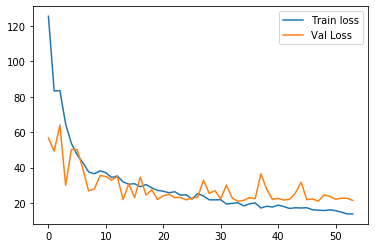

In [0]:
plt.plot(historyAge.history['loss'], label='Train loss')
plt.plot(historyAge.history['val_loss'], label='Val Loss')
plt.legend();

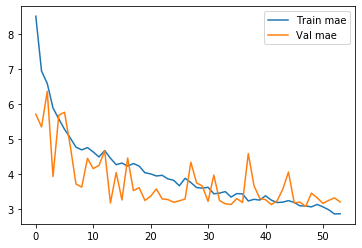

In [0]:
plt.plot(historyAge.history['mean_absolute_error'], label='Train mae')
plt.plot(historyAge.history['val_mean_absolute_error'], label='Val mae')
plt.legend();